# Basemaps

Here we will show the three options we have for basemaps. These can either be created as backgrounds for plotting your gridded / point data on top of, or used by themselves. 

Either set the parameters `simple_basemap`, `imagery_basemap`,or `modis_basemap` to `True` in either function `maps.plot_grd()` or `maps.basemap()`. 

Alternatives, use the equivalent functions on existing figures: 
`maps.add_simple_basemap()`, `maps.add_imagery()`, or `maps.add_modis()`.

Import the modules

In [1]:
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, maps, regions

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

## Basemap of grounded vs floating ice 

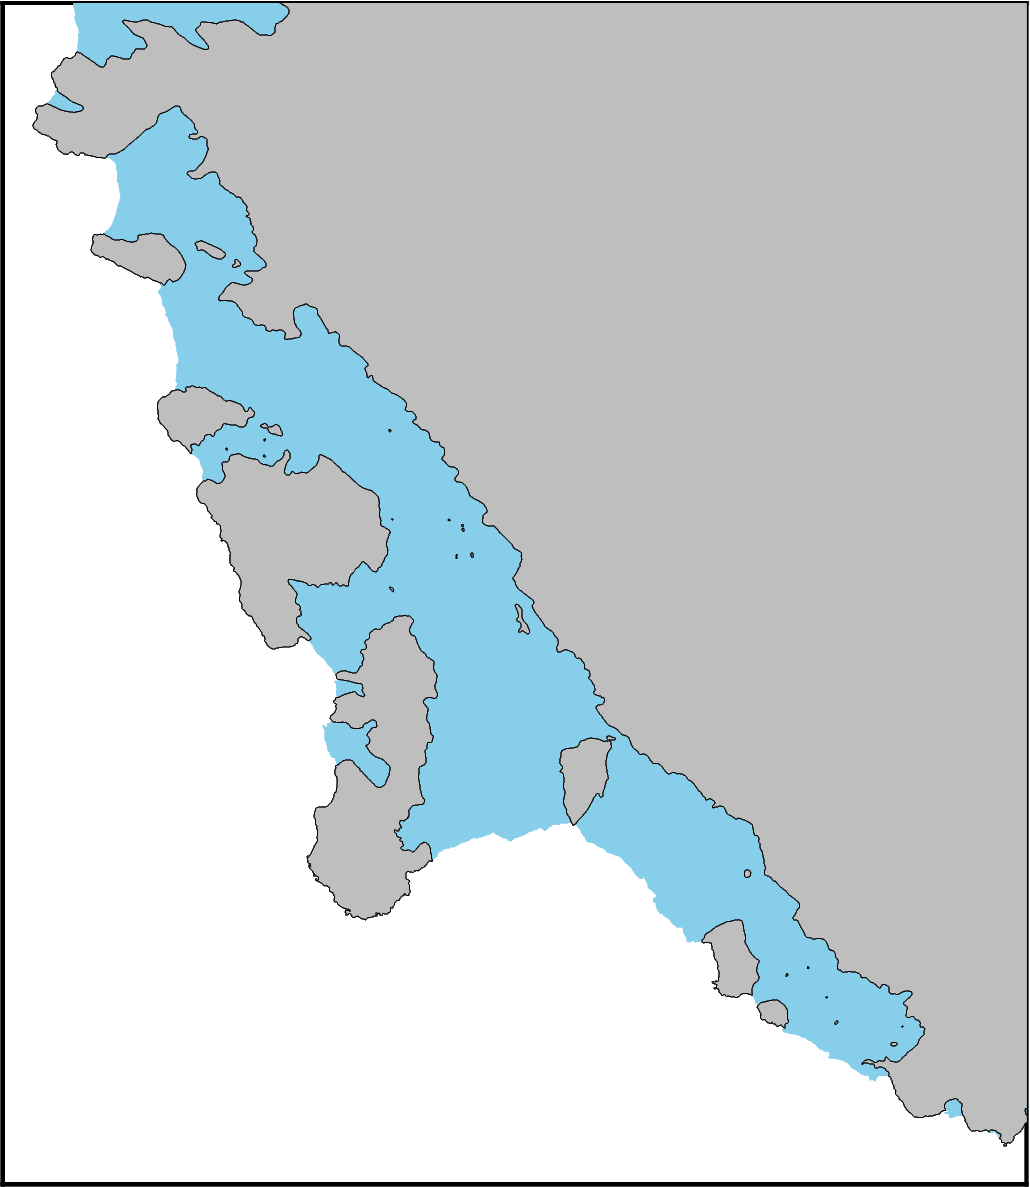

In [3]:
# by default uses Depoorter et al. 2013 shapefiles
fig = maps.basemap(
    simple_basemap=True,
    region=regions.getz_ice_shelf,
)

fig.show(dpi=200)

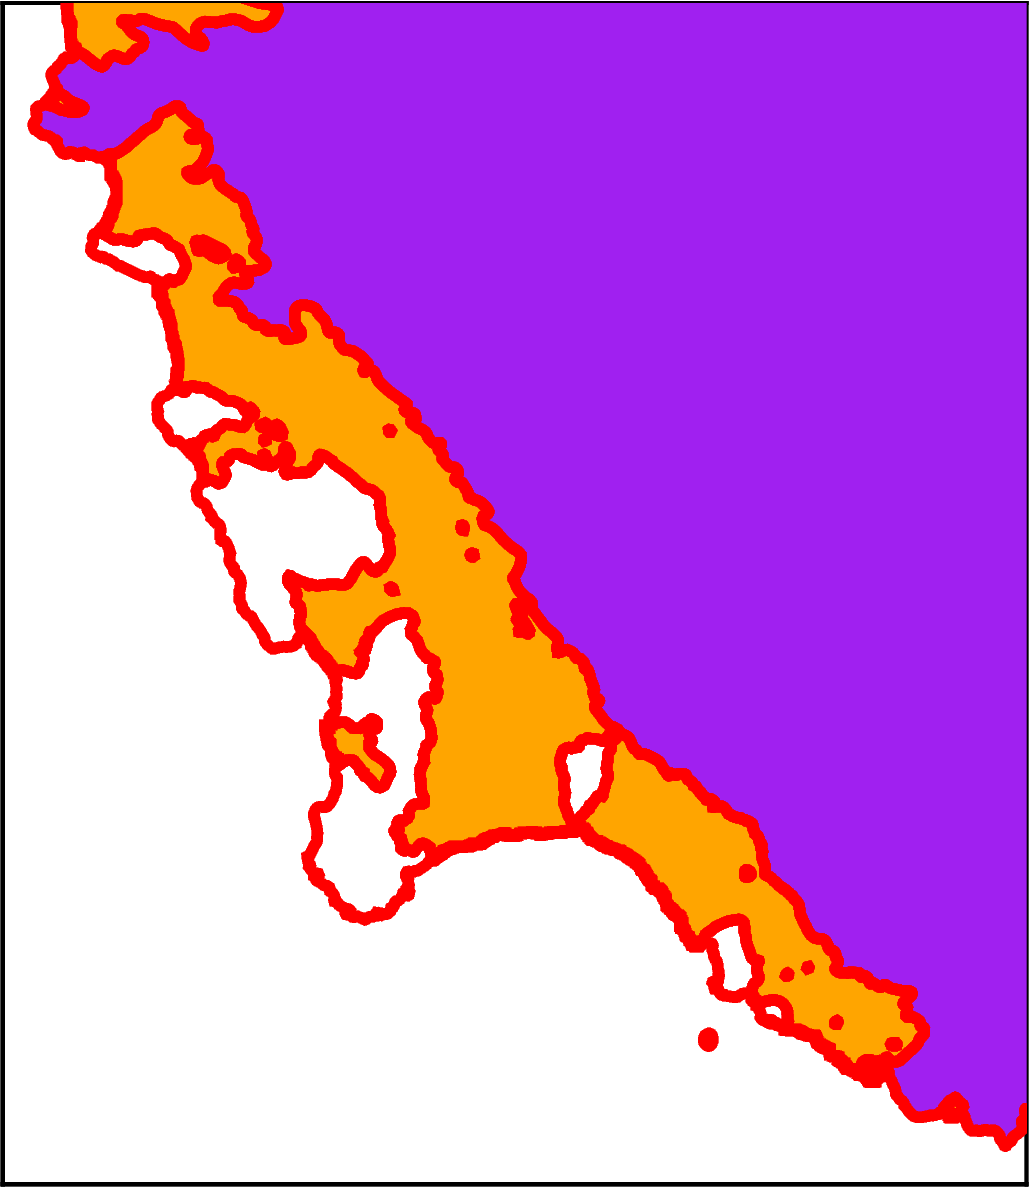

In [4]:
# change the version of the simple basemap to use MEaSUREs v2 shapefiles
# specify different colors
fig = maps.basemap(
    simple_basemap=True,
    simple_basemap_version="depoorter-2013",
    simple_basemap_grounded_color="purple",
    simple_basemap_floating_color="orange",
    simple_basemap_pen="4p,red",
    region=regions.getz_ice_shelf,
)

fig.show(dpi=200)

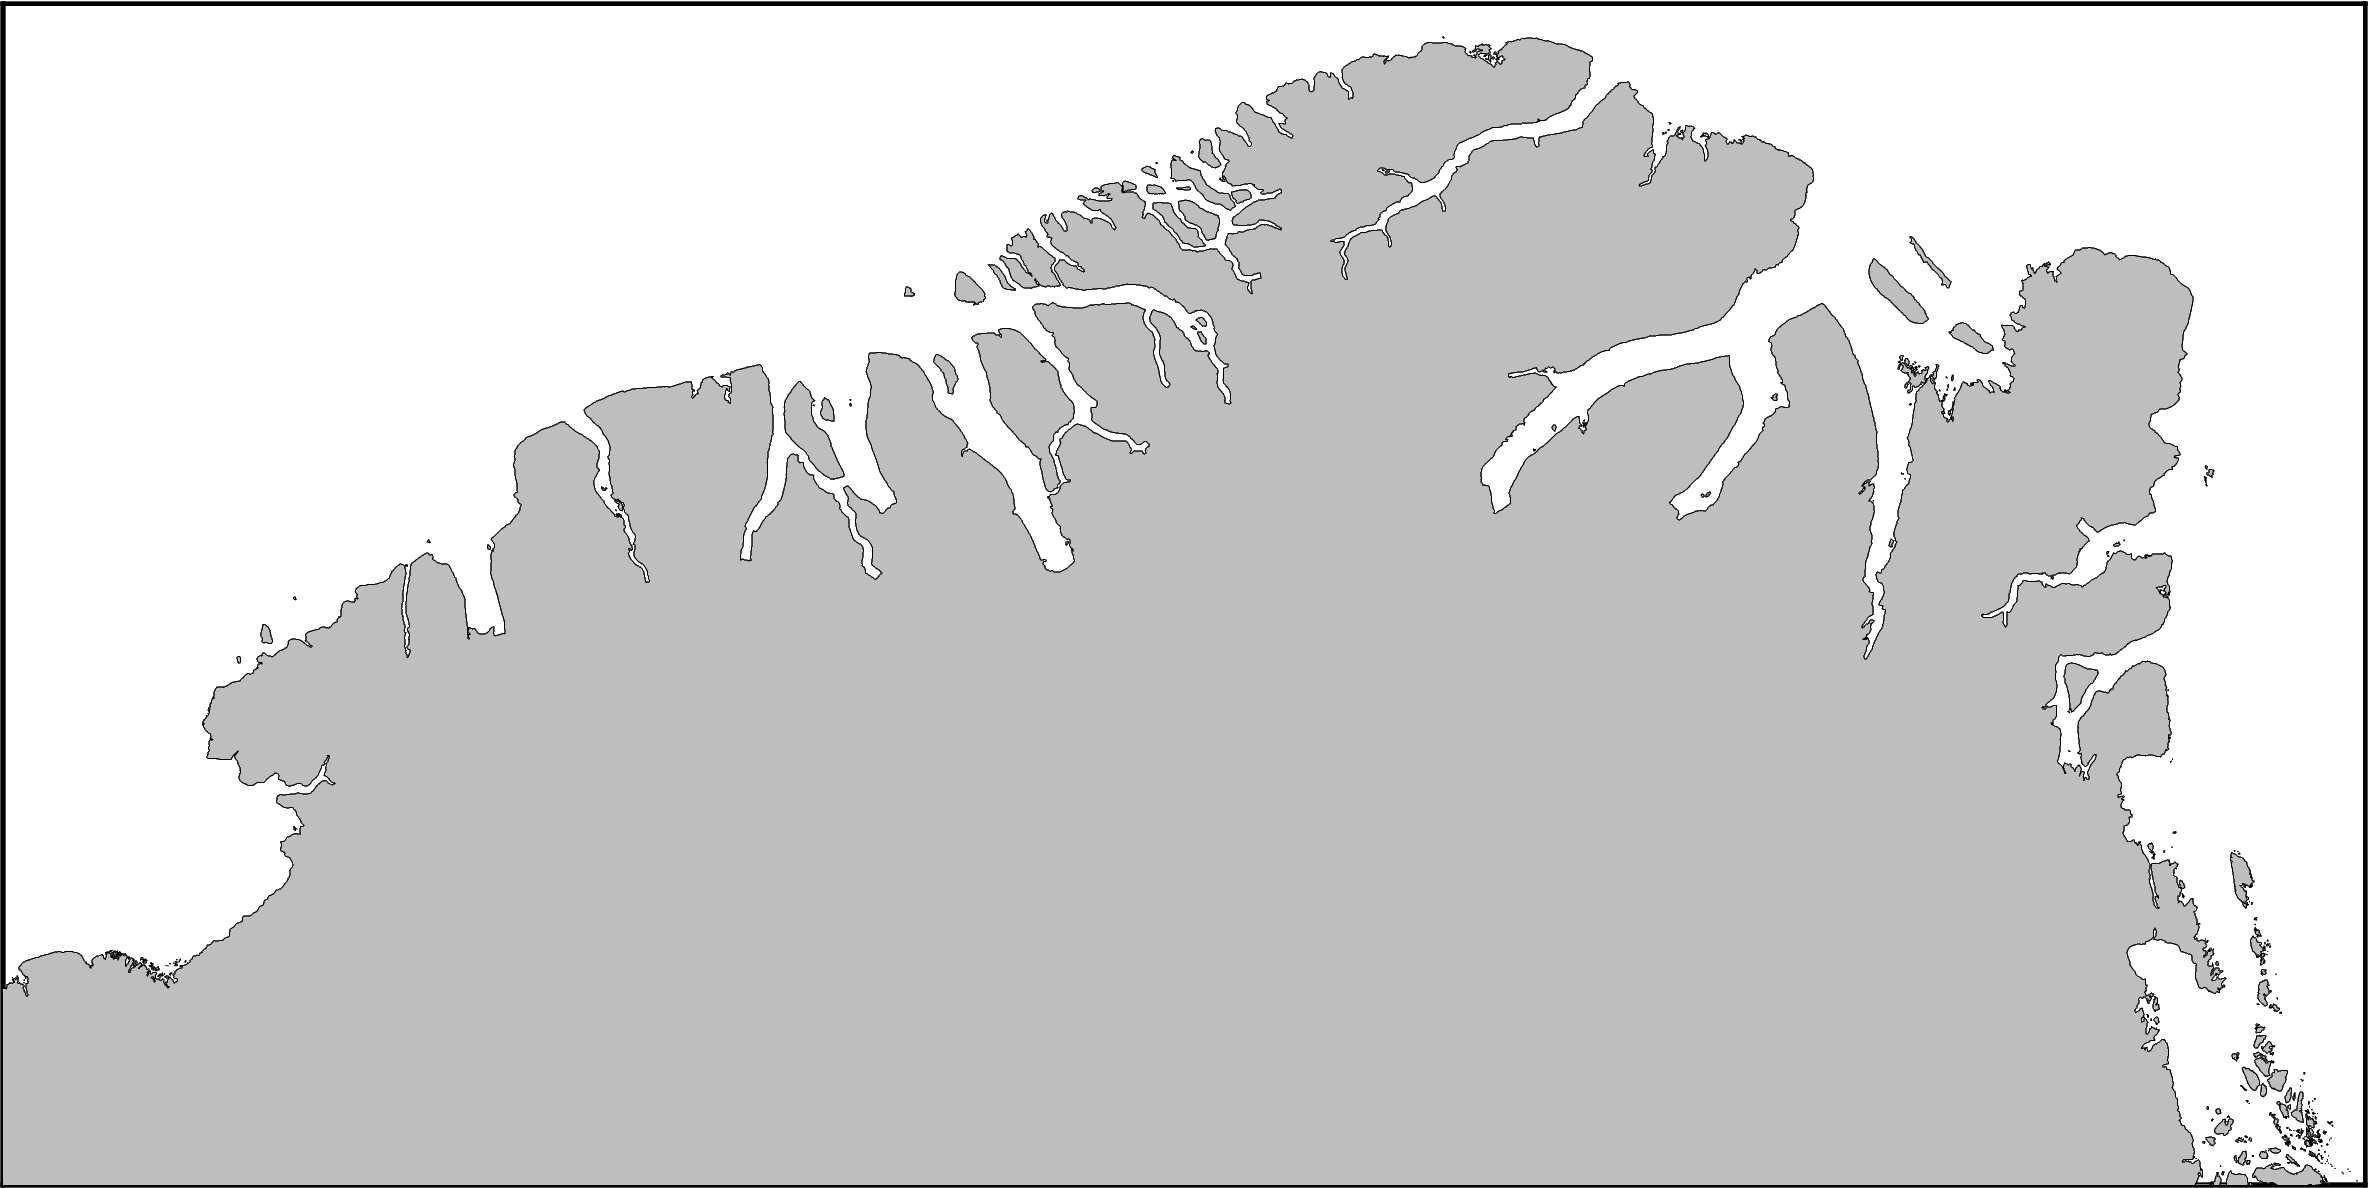

In [5]:
# equivalent for the northern hemisphere only shows grounded ice
fig = maps.basemap(
    simple_basemap=True,
    hemisphere="north",
    region=regions.north_greenland,
)

fig.show(dpi=200)

### Add to existing figure
This will cover any portions of the existing figure for grounded or floating ice. You can supply options kwarg `transparency` to make the simple basemap transparent.

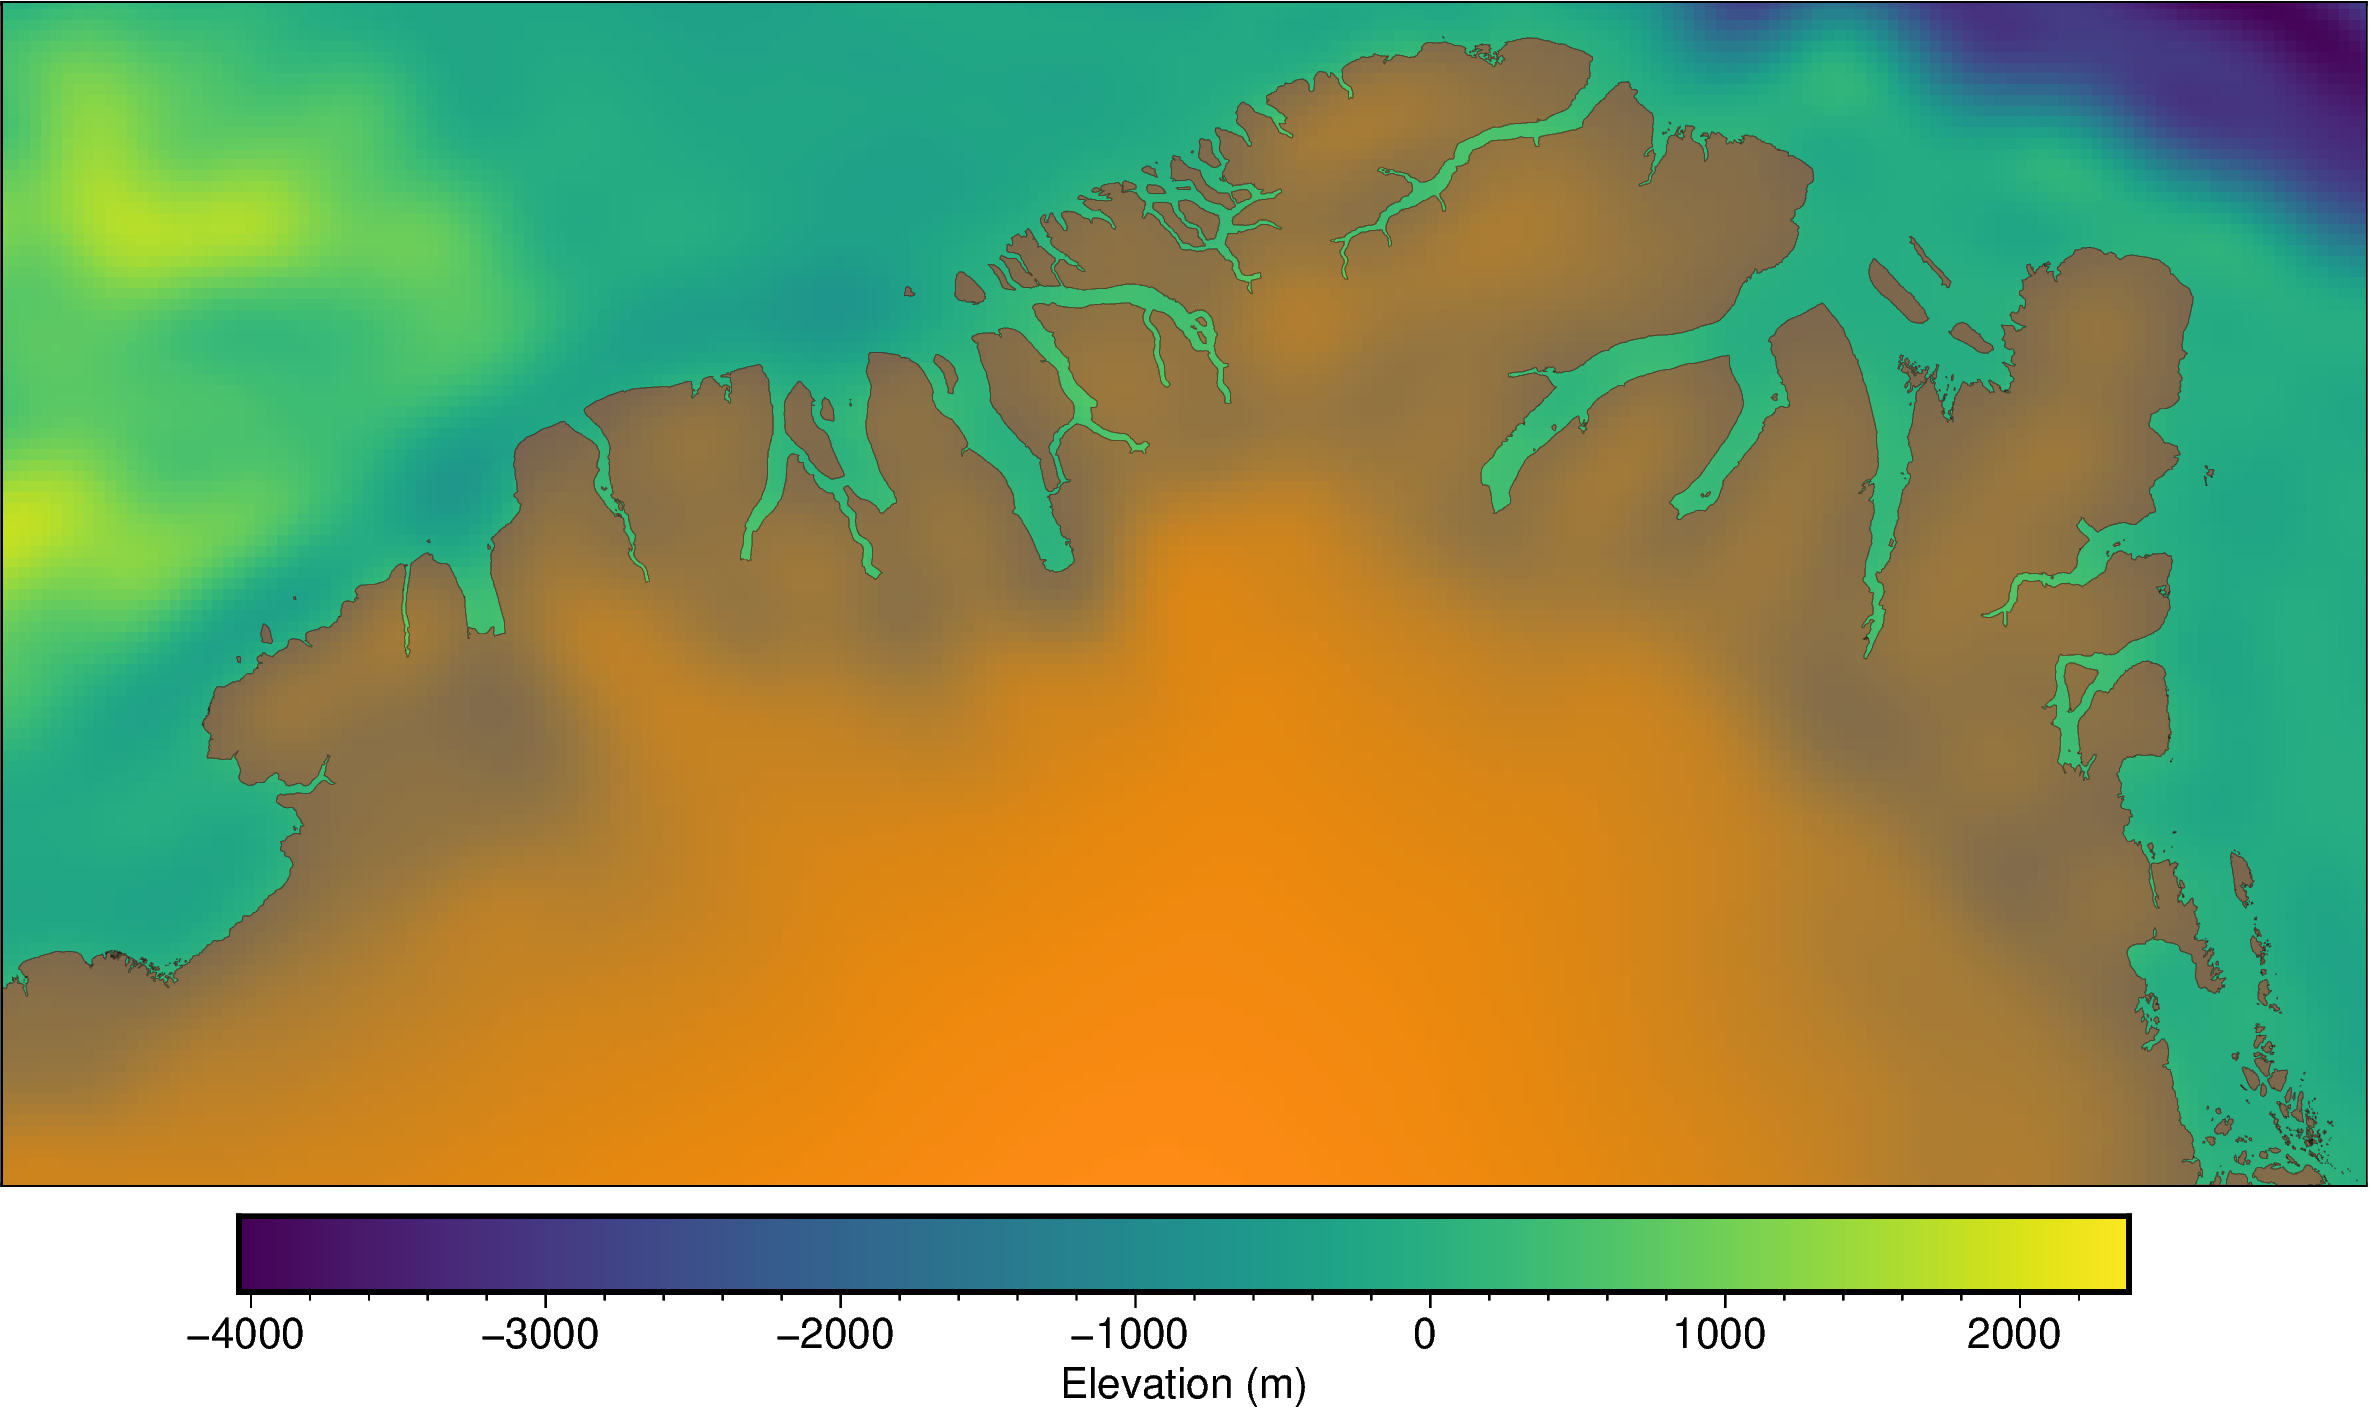

In [6]:
# create figure
fig = maps.plot_grd(
    fetch.etopo(hemisphere="north"),
    region=regions.north_greenland,
    cbar_label="Elevation (m)",
    hemisphere="north",
)

# add the basemap
fig.add_simple_basemap(
    grounded_color="red",
    transparency=60,
)
fig.show(dpi=200)

## Satellite imagery basemap

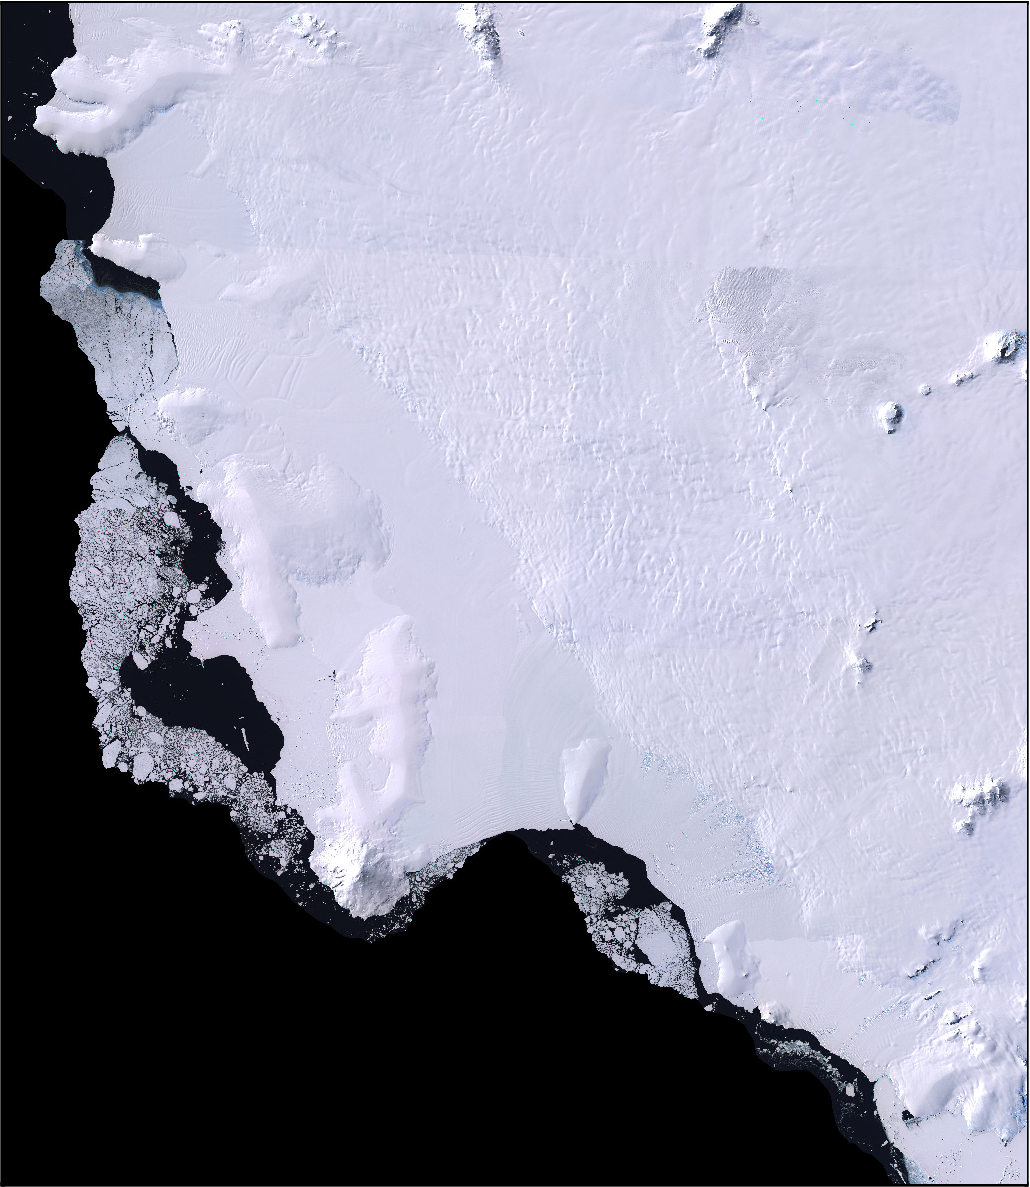

In [7]:
fig = maps.basemap(
    imagery_basemap=True,
    region=regions.getz_ice_shelf,
)

fig.show(dpi=200)

### Add to existing figure

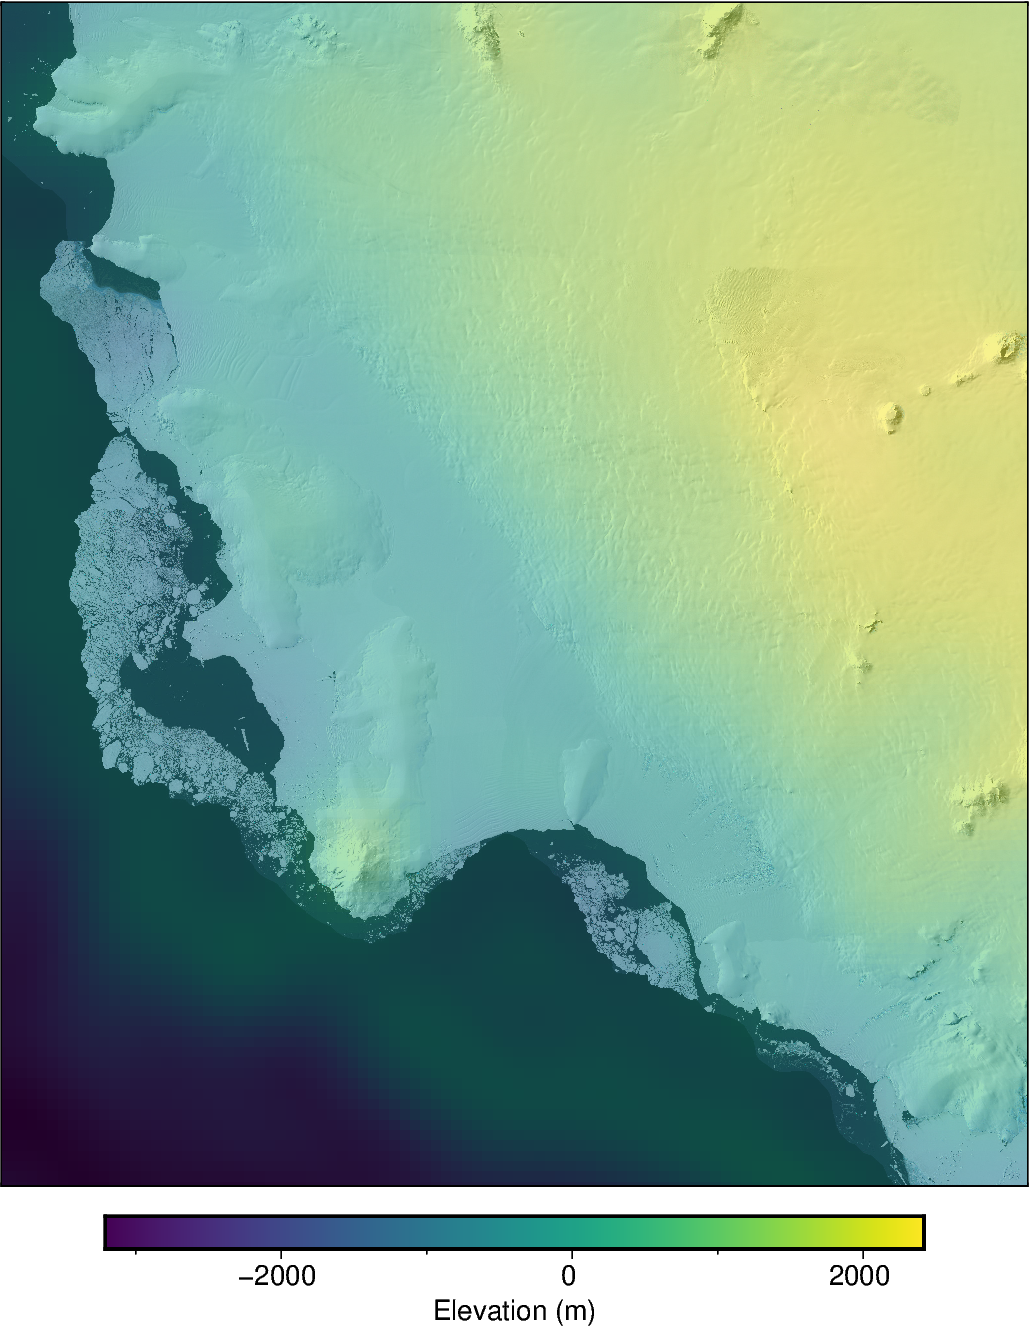

In [8]:
# create figure
fig = maps.plot_grd(
    fetch.etopo(),
    region=regions.getz_ice_shelf,
    cbar_label="Elevation (m)",
)

# add the LIMA imagery, but make it semi-transparent to be able to see grid values
# behind
fig.add_imagery(
    transparency=50,
)
fig.show(dpi=200)

## MODIS imagery basemap

/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:667: RuntimeWarning: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)


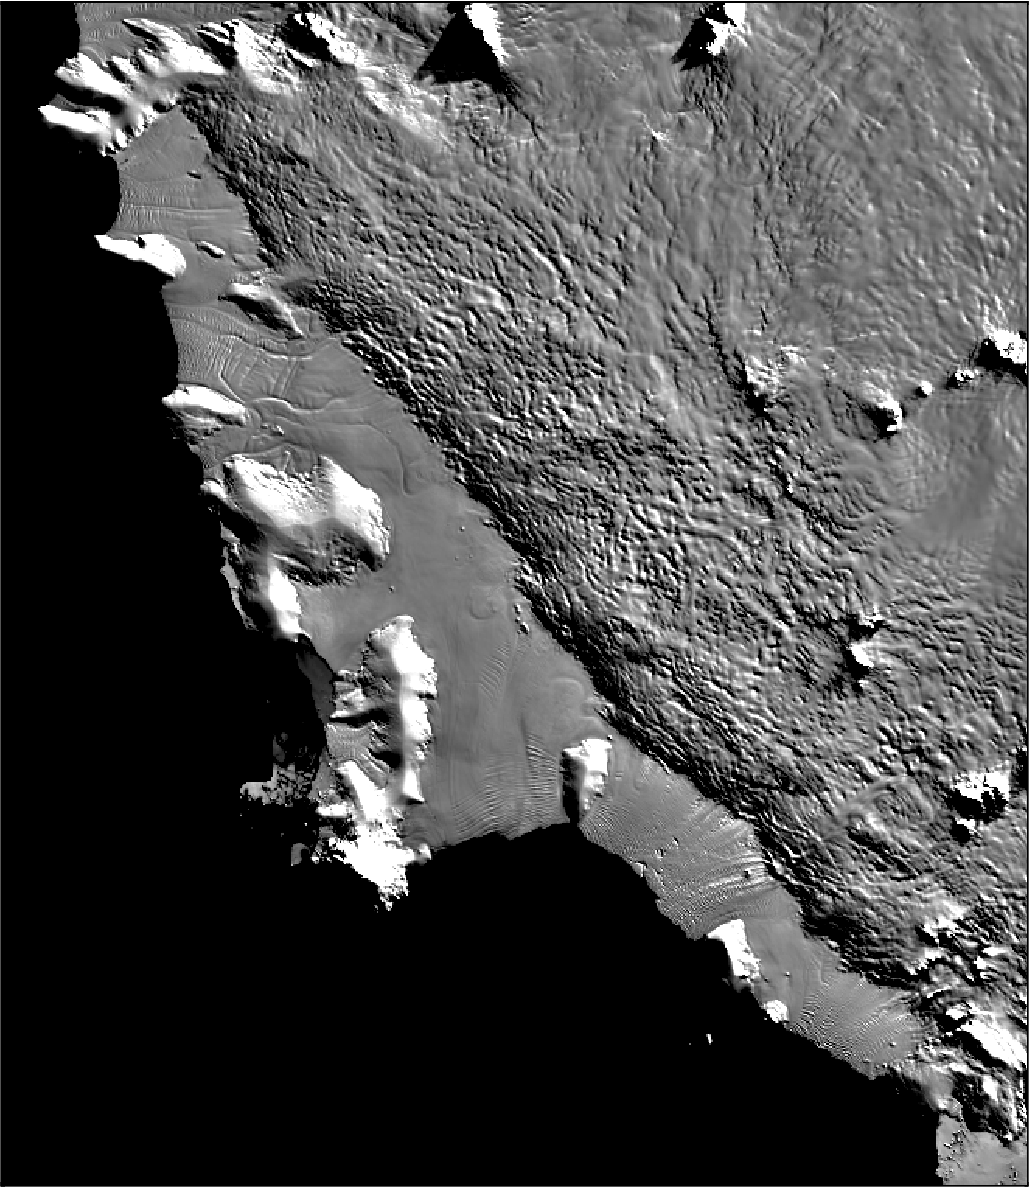

In [9]:
# by default for Antarctica is 750 m MODIS resolution
fig = maps.basemap(
    modis_basemap=True,
    region=regions.getz_ice_shelf,
    # modis_version="125m", # uncomment this to use 125 m resolution MODIS imagery
)
fig.show(dpi=200)

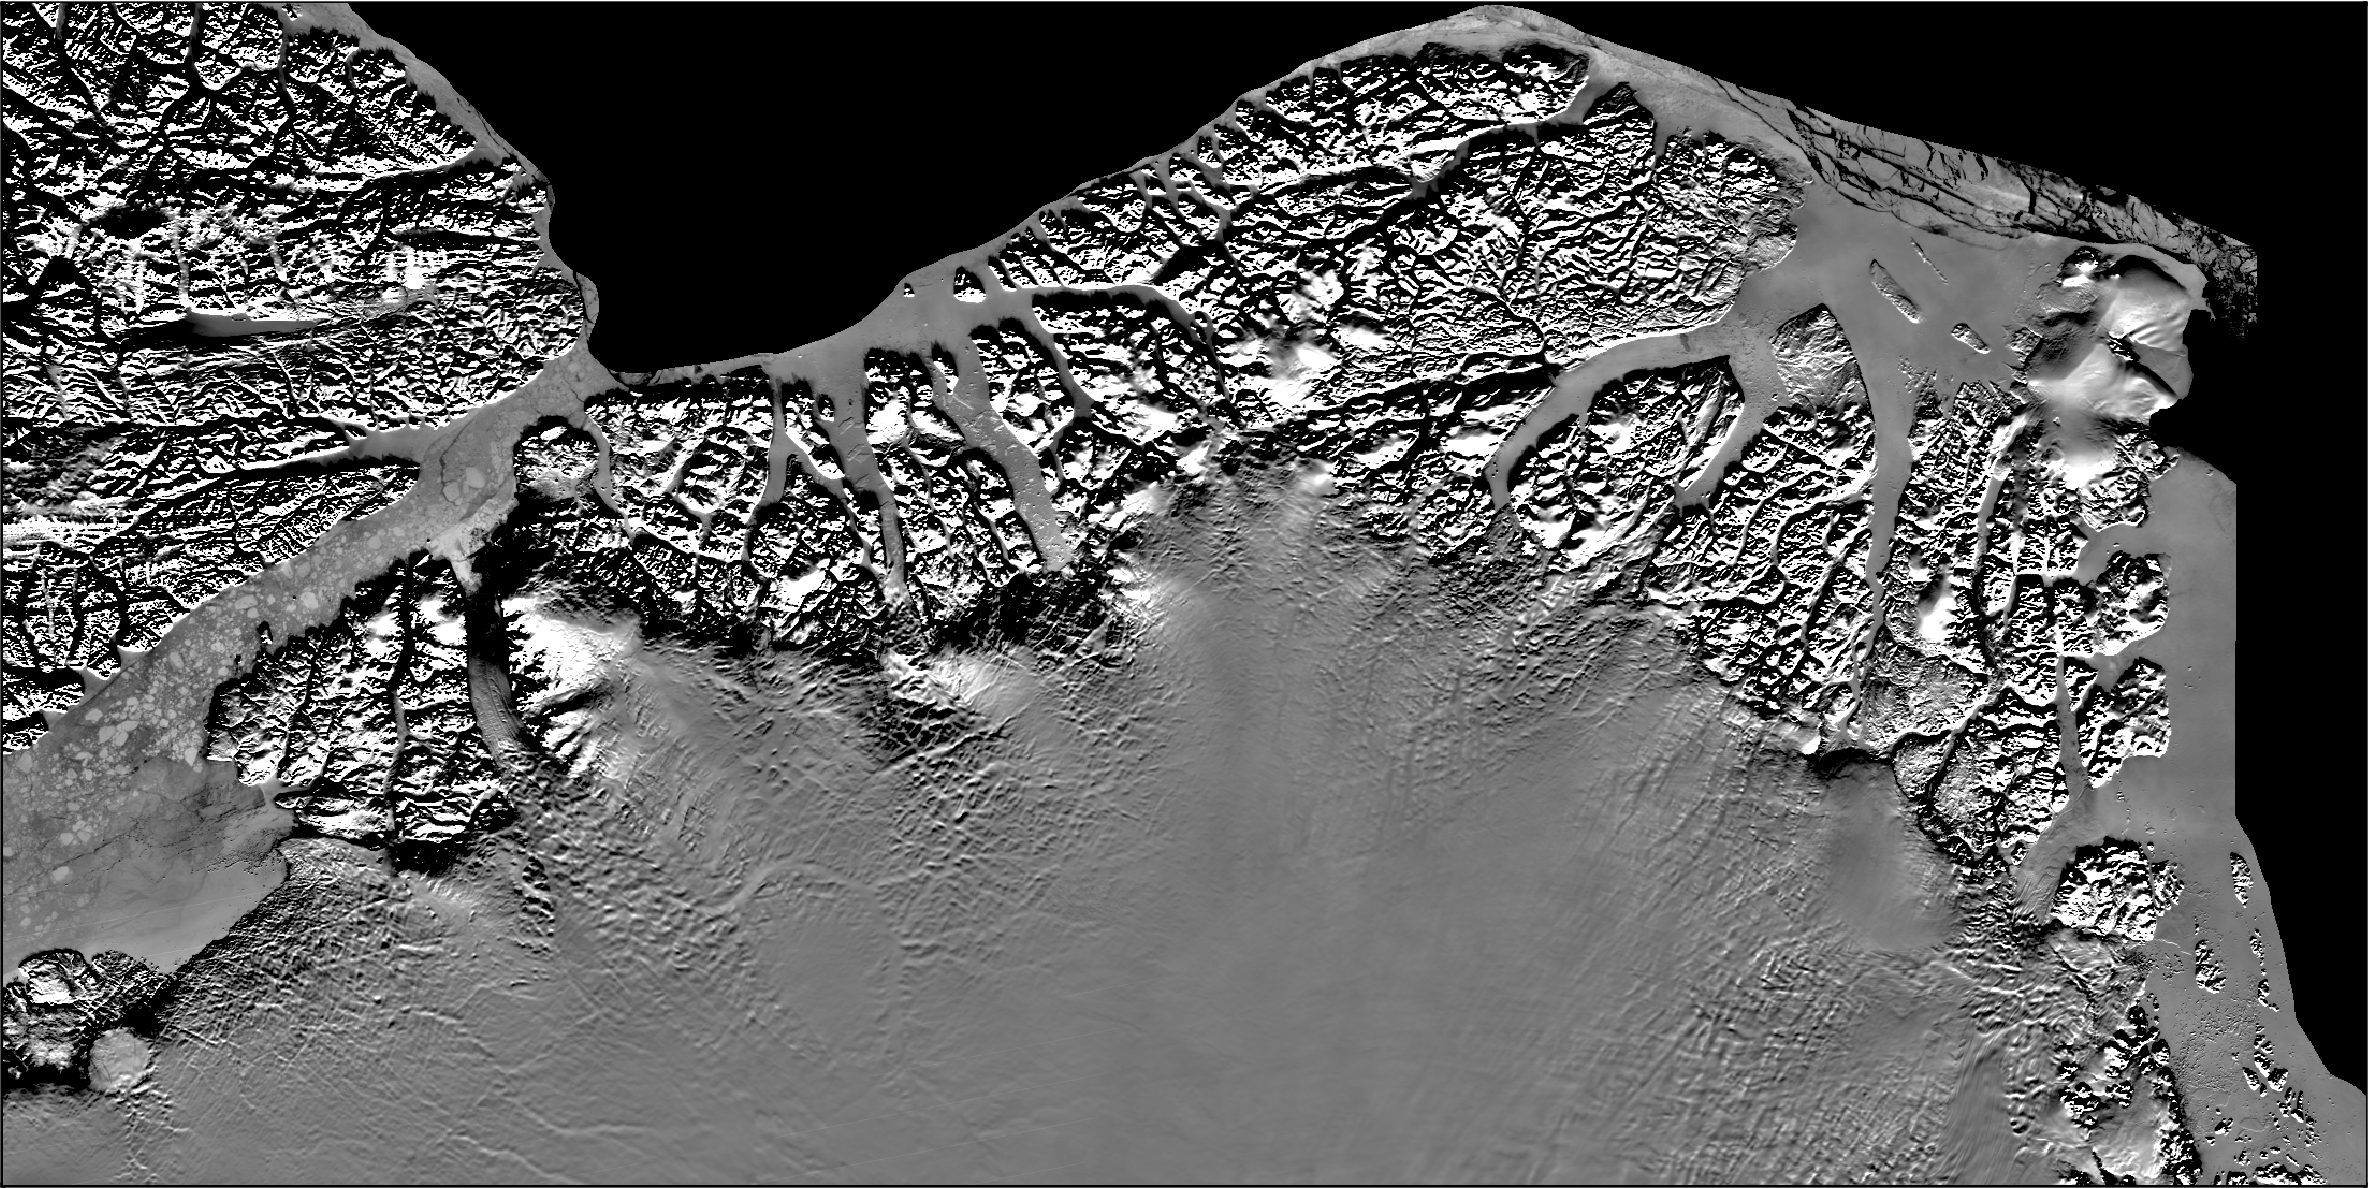

In [10]:
# equivalent for the northern hemisphere, by default uses 500 m MODIS resolution
fig = maps.basemap(
    modis_basemap=True,
    hemisphere="north",
    region=regions.north_greenland,
)

fig.show(dpi=200)

### Add to existing figure

/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.12/site-packages/pygmt/clib/session.py:667: RuntimeWarning: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
  status = c_call_module(self.session_pointer, module.encode(), mode, argv)


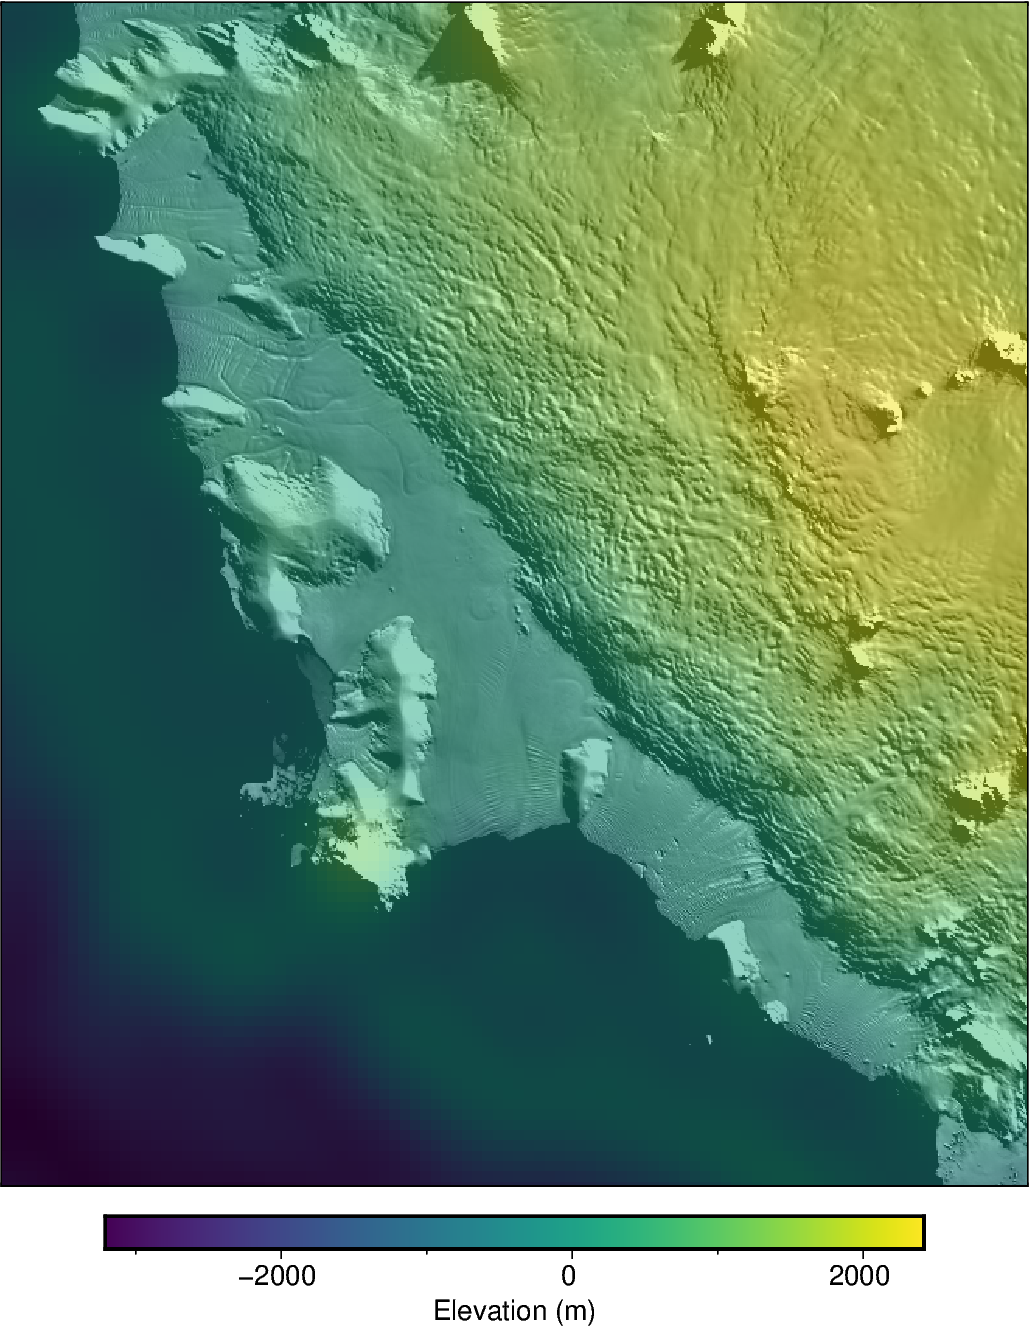

In [11]:
# create figure
fig = maps.plot_grd(
    fetch.etopo(),
    region=regions.getz_ice_shelf,
    cbar_label="Elevation (m)",
)

# add the MODIS imagery, but make it semi-transparent to be able to see grid values
# behind
fig.add_modis(
    transparency=50,
)
fig.show(dpi=200)